In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# 1) Data Loading:

In [2]:
bbc_path = '../_data/_txt_data/bbc-fulltext/bbc/'

In [3]:
data_dictionary = {"news_text": [],
                   'news_label': []}

for directory in os.listdir(bbc_path):
    if os.path.isdir(os.path.join(bbc_path, directory)):
        
        directory_path = os.path.join(bbc_path, directory)
        directory_files = sorted(os.listdir(directory_path))
        
        for file_name in directory_files:
            try:
                news_file = open(os.path.join(directory_path, file_name), 'r')
                data_dictionary['news_text'].append(' '.join(news_file.read().split()))
                data_dictionary['news_label'].append(directory)
            except:
                pass
            
data = pd.DataFrame(data_dictionary)

In [4]:
data

,news_text,news_label
0,Gallery unveils interactive tree A Christmas t...,entertainment
1,Jarre joins fairytale celebration French music...,entertainment
2,Musical treatment for Capra film The classic f...,entertainment
3,Richard and Judy choose top books The 10 autho...,entertainment
4,Poppins musical gets flying start The stage ad...,entertainment
...,...,...
2219,BT program to beat dialler scams BT is introdu...,tech
2220,Spam e-mails tempt net shoppers Computer users...,tech
2221,Be careful how you code A new European directi...,tech
2222,US cyber security chief resigns The man making...,tech


# 2) Data Visuallization:

In [5]:
! pip install wordcloud

In [6]:
from wordcloud import WordCloud, STOPWORDS

In [7]:
my_stop_words = STOPWORDS.copy()

additional_stop_words = ['will', 'said', 'u', 'uk', 'us', 'now', 'time', 'made',
                         'won', 'one', 'two', 'mr', 'may', 'new', 'make',
                         'first', 'mp', 'want', 'say', 'says', 'year']

for w in additional_stop_words:
    my_stop_words.add(w)
    
n_key_words = 30
    
key_words_list = set()

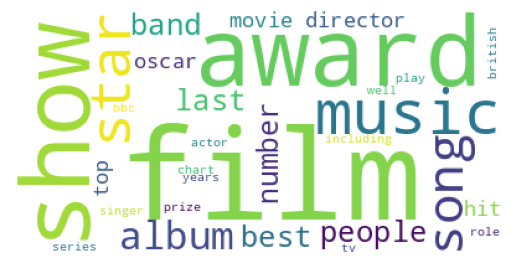

In [8]:
text = ' '.join(data[data['news_label'] == 'entertainment']['news_text'])

wcloud = WordCloud(stopwords=my_stop_words,
                   background_color='white',
                   max_words=n_key_words).generate(text=text.lower())

key_words_list = key_words_list.union(set(wcloud.words_.keys()))

plt.imshow(wcloud);
plt.axis('off');

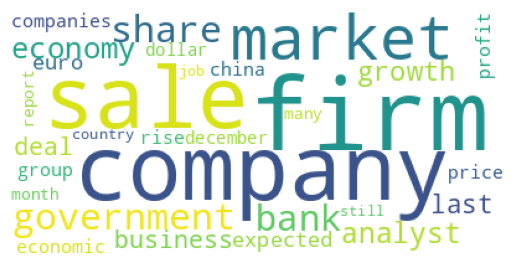

In [9]:
text = ' '.join(data[data['news_label'] == 'business']['news_text'])

wcloud = WordCloud(stopwords=my_stop_words,
                   background_color='white',
                   max_words=n_key_words).generate(text=text.lower())

key_words_list = key_words_list.union(set(wcloud.words_.keys()))

plt.imshow(wcloud);
plt.axis('off');

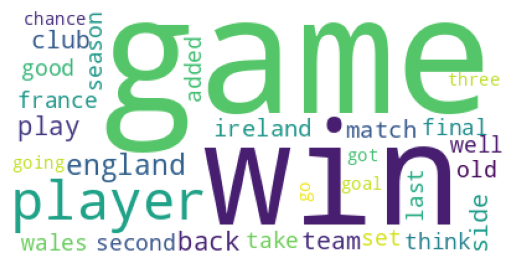

In [10]:
text = ' '.join(data[data['news_label'] == 'sport']['news_text'])

wcloud = WordCloud(stopwords=my_stop_words,
                   background_color='white',
                   max_words=n_key_words).generate(text=text.lower())

key_words_list = key_words_list.union(set(wcloud.words_.keys()))

plt.imshow(wcloud);
plt.axis('off');

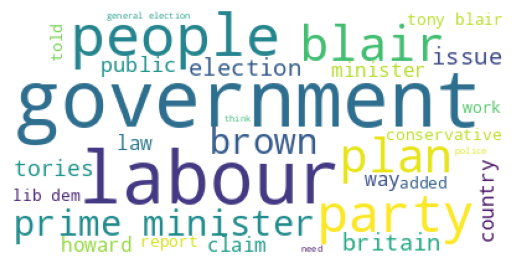

In [11]:
text = ' '.join(data[data['news_label'] == 'politics']['news_text'])

wcloud = WordCloud(stopwords=my_stop_words,
                   background_color='white',
                   max_words=n_key_words).generate(text=text.lower())

key_words_list = key_words_list.union(set(wcloud.words_.keys()))

plt.imshow(wcloud);
plt.axis('off');

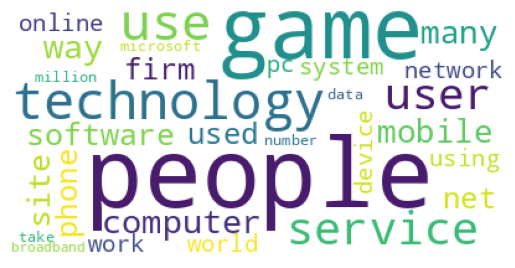

In [12]:
text = ' '.join(data[data['news_label'] == 'tech']['news_text'])

wcloud = WordCloud(stopwords=my_stop_words,
                   background_color='white',
                   max_words=n_key_words).generate(text=text.lower())

key_words_list = key_words_list.union(set(wcloud.words_.keys()))

plt.imshow(wcloud);
plt.axis('off');

In [13]:
key_words_list = list(key_words_list)

In [14]:
len(key_words_list)

132

# Co-occurrence Matrix:

In [15]:
cooc = pd.DataFrame({})

for kw in key_words_list:
    
    cooc[kw] = data['news_text'].str.lower().str.find(kw).apply(lambda x: 0 if x == -1 else 1)

/var/folders/n_/r9yj_2js1418_tccsyp_f6s80000gn/T/ipykernel_7429/388123906.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cooc[kw] = data['news_text'].str.lower().str.find(kw).apply(lambda x: 0 if x == -1 else 1)
/var/folders/n_/r9yj_2js1418_tccsyp_f6s80000gn/T/ipykernel_7429/388123906.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cooc[kw] = data['news_text'].str.lower().str.find(kw).apply(lambda x: 0 if x == -1 else 1)
/var/folders/n_/r9yj_2js1418_tccsyp_f6s80000gn/T/ipykernel_7429/388123906.py:5: PerformanceWarning: 

/var/folders/n_/r9yj_2js1418_tccsyp_f6s80000gn/T/ipykernel_7429/388123906.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cooc[kw] = data['news_text'].str.lower().str.find(kw).apply(lambda x: 0 if x == -1 else 1)
/var/folders/n_/r9yj_2js1418_tccsyp_f6s80000gn/T/ipykernel_7429/388123906.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cooc[kw] = data['news_text'].str.lower().str.find(kw).apply(lambda x: 0 if x == -1 else 1)
/var/folders/n_/r9yj_2js1418_tccsyp_f6s80000gn/T/ipykernel_7429/388123906.py:5: PerformanceWarning: 

In [16]:
cooc

,profit,star,bbc,sale,still,going,britain,told,computer,china,...,singer,well,number,technology,euro,net,lib dem,rise,oscar,film
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,0,0,1,0,0,1,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
2220,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2221,0,0,1,0,0,1,1,0,1,0,...,0,0,0,1,1,1,0,0,0,0
2222,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC

from sklearn.pipeline import Pipeline

In [18]:
X_train, X_test, y_train, y_test = train_test_split(cooc, 
                                                    data['news_label'])

In [19]:
clf1 = DTC(criterion='gini')

clf2 = RFC(n_estimators=20, criterion='gini')

clf3 = ABC(estimator=DTC(criterion='gini'), n_estimators=20)

clf4 = Pipeline(steps=[('Dimension Reduction', PCA(n_components=0.95)),
                       ('Classifier', DTC(criterion='gini'))])

clf5 = Pipeline(steps=[('Dimension Reduction', PCA(n_components=0.95)),
                       ('Classifier', RFC(n_estimators=20, criterion='gini'))])

clf6 = Pipeline(steps=[('Dimension Reduction', PCA(n_components=0.95)),
                       ('Classifier', ABC(estimator=DTC(criterion='gini'),
                                          n_estimators=20))])

clfs = [clf1, clf2, clf3, clf4, clf5, clf6]

for clf in clfs:
    clf.fit(X_train, y_train)
    

In [20]:
clf6

Pipeline(steps=[('Dimension Reduction', PCA(n_components=0.95)),
                ('Classifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                    n_estimators=20))])

# Model Evaluation:

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
for clf in clfs:
    print(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

0.8597122302158273
0.9370503597122302
0.8489208633093526
0.7985611510791367
0.8794964028776978
0.7985611510791367


In [23]:
from sklearn.model_selection import KFold

In [24]:
kf = KFold(n_splits=10)

In [29]:
acc_list = []
for i, (train_index, test_index) in enumerate(kf.split(cooc)):
    X_train, y_train = cooc.iloc[train_index, :], data['news_label'][train_index]
    X_test, y_test = cooc.iloc[test_index, :], data['news_label'][test_index]
    
    clf1.fit(X_train, y_train)
    
    acc_list.append(accuracy_score(y_true=y_test, y_pred=clf1.predict(X_test)))

print(np.mean(acc_list), np.std(acc_list))

0.7473215367834202 0.05482816202592274


In [27]:
acc_list = []
for i, (train_index, test_index) in enumerate(kf.split(cooc)):
    X_train, y_train = cooc.iloc[train_index, :], data['news_label'][train_index]
    X_test, y_test = cooc.iloc[test_index, :], data['news_label'][test_index]
    
    clf2.fit(X_train, y_train)
    
    acc_list.append(accuracy_score(y_true=y_test, y_pred=clf2.predict(X_test)))

print(np.mean(acc_list), np.std(acc_list))

0.8484769522886115 0.06624930207193704


In [31]:
acc_list = []
for i, (train_index, test_index) in enumerate(kf.split(cooc)):
    X_train, y_train = cooc.iloc[train_index, :], data['news_label'][train_index]
    X_test, y_test = cooc.iloc[test_index, :], data['news_label'][test_index]
    
    clf3.fit(X_train, y_train)
    
    acc_list.append(accuracy_score(y_true=y_test, y_pred=clf3.predict(X_test)))

print(np.mean(acc_list), np.std(acc_list))

0.7653052155294309 0.04780921663780337


In [32]:
acc_list = []
for i, (train_index, test_index) in enumerate(kf.split(cooc)):
    X_train, y_train = cooc.iloc[train_index, :], data['news_label'][train_index]
    X_test, y_test = cooc.iloc[test_index, :], data['news_label'][test_index]
    
    clf4.fit(X_train, y_train)
    
    acc_list.append(accuracy_score(y_true=y_test, y_pred=clf4.predict(X_test)))

print(np.mean(acc_list), np.std(acc_list))

0.7181493152345169 0.05801218689549225


In [33]:
acc_list = []
for i, (train_index, test_index) in enumerate(kf.split(cooc)):
    X_train, y_train = cooc.iloc[train_index, :], data['news_label'][train_index]
    X_test, y_test = cooc.iloc[test_index, :], data['news_label'][test_index]
    
    clf5.fit(X_train, y_train)
    
    acc_list.append(accuracy_score(y_true=y_test, y_pred=clf5.predict(X_test)))

print(np.mean(acc_list), np.std(acc_list))

0.754977174483901 0.0750359539248173


In [34]:
import pickle

In [37]:
filename = "RFC_model.pickle"
pickle.dump(clf2, open(filename, 'wb'))

In [39]:
model = pickle.load(open(filename, 'rb'))

In [40]:
model

RandomForestClassifier(n_estimators=20)

In [52]:
model.predict(cooc.loc[[np.random.randint(0, 2224)]])

array(['tech'], dtype=object)